In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.optimize import root
from functools import partial
import math

# Homework CNS Week 3
## Stefan Iacob (s4575121), Bas Krahmer (s4616553), Davide Sabeddu (s1032453)

## Assignment 1
### a)



In [2]:
def f_V_prime(tau, I, V):
    return (I-V)/tau

def mod_euler(func, h, tau, t, V, I, spikes, pulse):
        
    if (V>=1 or pulse):
        V = 0
        spikes += 1
        
    V_approx = V + h * func(tau, I, V)
    V_next = V + 0.5 * h * (func(tau, I, V) + func(tau, I, V_approx))
    t_next = t + h
    return t_next, V_next, spikes

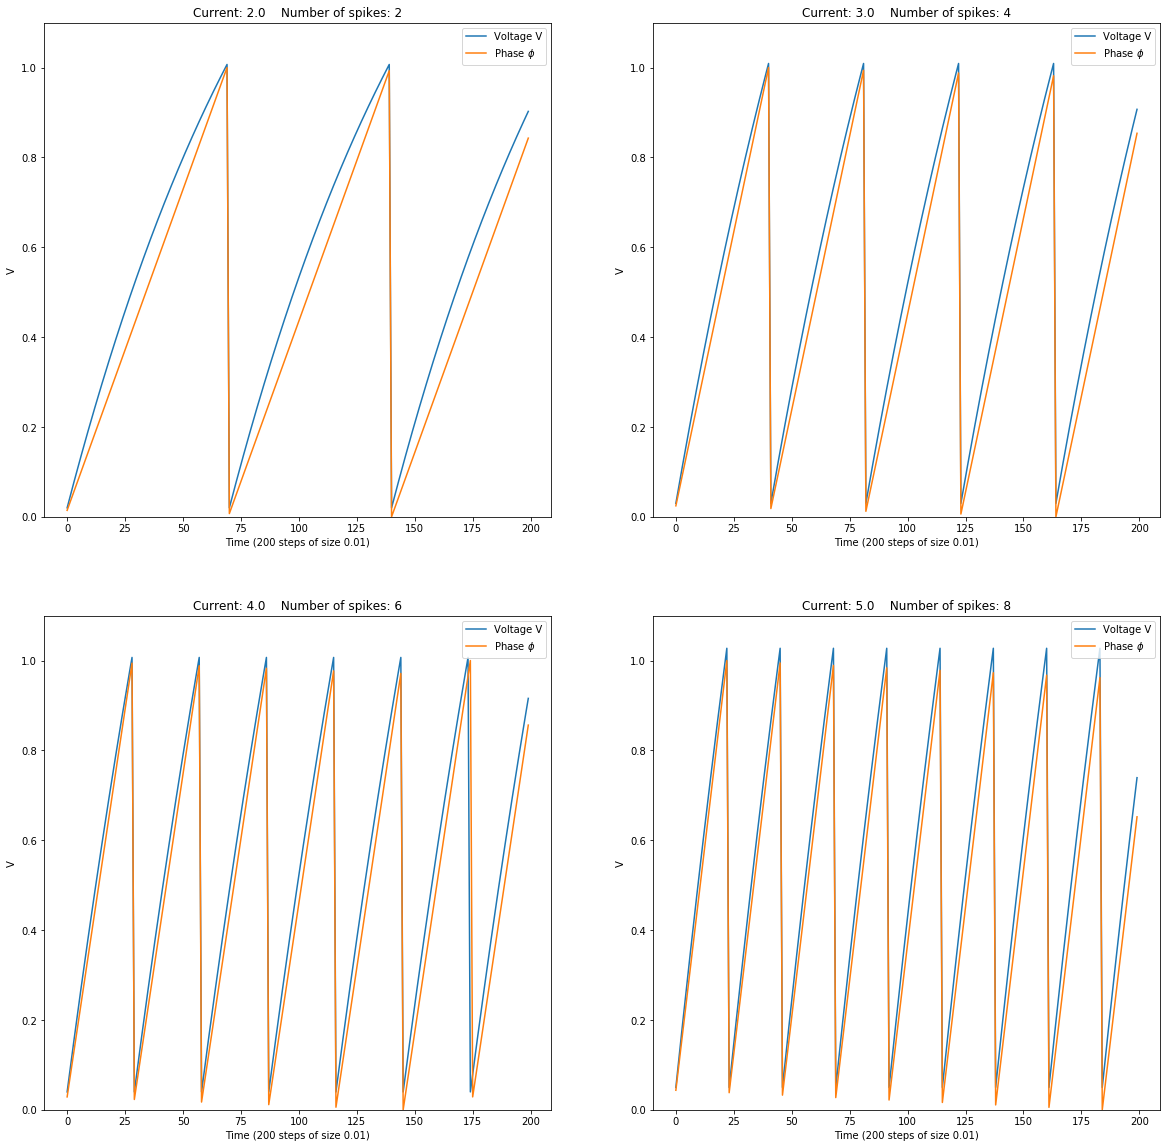

In [3]:
# Code below inspired from http://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

nr_plots = 4
p_i = 0 # plot index

plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots(int(nr_plots/2), 2)
current_list, spike_list = [], []


# Initialization
step_size, nr_steps, nr_pulses = 0.01, 200, 0
pulse = False
x_lim = (0, nr_steps*step_size)
V_vals = np.zeros((nr_plots, nr_steps))
t_vals = np.zeros((nr_plots, nr_steps))
delta_V_vals = np.zeros((nr_plots, nr_steps))
delta_phi_vals = np.zeros((nr_plots, nr_steps))
phase_vals = np.zeros((nr_plots, nr_steps))
T = np.zeros(nr_plots)

# For current values
for i, I in enumerate(np.linspace(2, 5, nr_plots)):
    
    # Reset variables
    spikes, tau, t, V = 0, 1, 0, 0
    t_old = 0
    first_spike = True
    
    
    # For each step
    for j in range(nr_steps):
        
        # See if there is a pulse this step
        if nr_pulses > 0:
            pulse = (j + 0.5*(nr_steps/nr_pulses))%(nr_steps/nr_pulses) == 0
        
        # Compute (delta) V after a hypothetical pulse
        _, V_pulse, _ = mod_euler(f_V_prime, step_size, tau, t, V, I, spikes, True)    
        
        # Compute actual V
        t, V_new, spikes_new = mod_euler(f_V_prime, step_size, tau, t, V, I, spikes, pulse)
        
        # Compute difference
        delta_V = np.abs(V_new-V_pulse)
        
        # Compare with actual configuration
        if pulse:
            V = V_pulse
        else:
            V = V_new

        # Update values
        V = V_new
        V_vals[i,j] = V
        t_vals[i,j] = t
        delta_V_vals[i,j] = delta_V
        
        # Determine cycle time
        if spikes_new > spikes:
            T[i] += (t - t_old)
            spikes = spikes_new
            t_old = t
        
        # Plot any pulse(s) as red line(s)
        if pulse:
            ax[int(p_i/2), p_i%2].axvline(j, color='r', linewidth=5, label='pulse')
    
    # Determine time of one cycle
    T[i] = T[i]/spikes
    
    # Compute the phase and normalize
    phase_vals[i] = t_vals[i] % T[i]
    phase_vals[i] -= phase_vals[i].min()
    phase_vals[i] /= phase_vals[i].max()
    
    
    # Normalize delta V between 0 and 1
#     delta_V_vals[i] -= delta_V_vals[i].min()
#     delta_V_vals[i] /= delta_V_vals[i].max()


    ax[int(p_i/2), p_i%2].plot(V_vals[i], label='Voltage V')
#     ax[int(p_i/2), p_i%2].plot(delta_V_vals[i], label='$\Delta$V (pulse voltage ' + str(pulse_voltage) + ')')
    ax[int(p_i/2), p_i%2].plot(phase_vals[i], label='Phase $\phi$')
    ax[int(p_i/2), p_i%2].legend()
    ax[int(p_i/2), p_i%2].set_xlabel('Time (' + str(nr_steps) + ' steps of size ' + str(step_size) + ')')
    ax[int(p_i/2), p_i%2].set_ylabel('V')
    ax[int(p_i/2), p_i%2].set_ylim((0, 1.1))
    ax[int(p_i/2), p_i%2].set_title('Current: ' + str(I) + '    Number of spikes: ' + str(spikes))
    
    p_i += 1

##### Step 1:
Since the entire trajectory is well-defined by the phase, phase and time are equivalent. Every value t can thus be coupled to a unique phase $\phi$.
##### Step 2:
<img src="2a.2.a.jpg">
<img src="2a.2.b.jpg">
<img src="2a.2.c.jpg">
##### Step 3:
The phase-resetting curve is defined as the difference in phase by a perturbation. Assuming a perturbation causes the neuron to spike, the value of $\Delta\phi$ is thus equal to the absolute value of $\phi$, since the phase after reset $\phi$' is always equal to 0. For this model, the PRC is thus identical to the curve of $\phi$.


Of course this only holds for perturbations sufficiently large to excite an action potential. For smaller perturbations, the difference in phase is proportional to $\Delta$V.

### b)
<img src="2b.1.jpg">

## Assignment 2
### a) b)
<img src="2a-b.jpg">

### c)
<img src="2c.jpg">